In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [29]:

df = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv',header=2, sep=",", )
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.158,75.299,75.441,75.583,75.725,75.868,76.010,76.152,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = df.iloc[:, :-1]  #removing unnamed column
variable_values = df[['Country Name','Country Code','Indicator Name', 'Indicator Code']].copy()

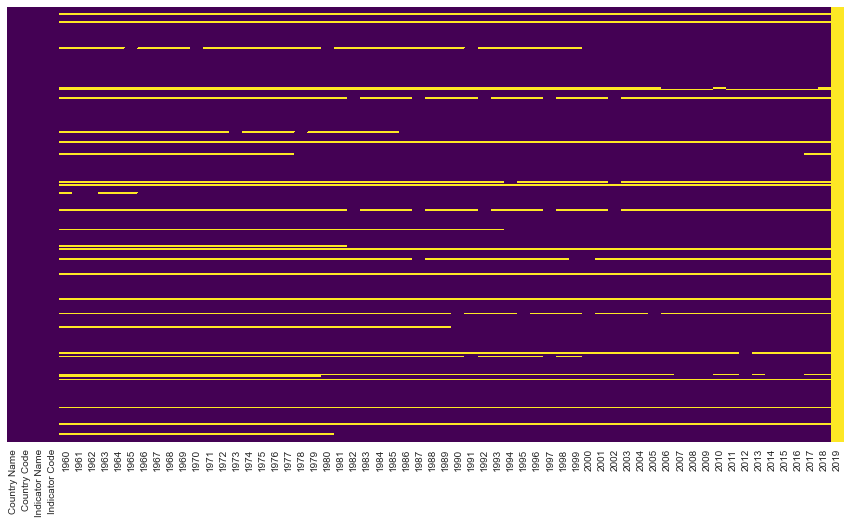

In [31]:
#to visualize null values in each column, heatmap is used
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax) 

#almost every column has some Nan values, column 64,65,66 are all empty. => dropping them from df.

#empty rows = around 5 => need to delete those rows.

In [32]:
df.shape  #last column removed

(264, 64)

## Deleting countries with no data

In [33]:
years_df=df   # a new dataframe is created that holds only years column

In [34]:
df.shape

(264, 64)

In [35]:
years_df.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],axis=1,inplace=True) 
years_df = years_df.iloc[:,:-1]
years_df.shape

(264, 59)

In [36]:
empty_index= years_df[years_df.isnull().all(axis=1)].index
empty_index    #stores the index which have all null years in years

Int64Index([4, 9, 82, 108, 147, 162, 177, 226, 243, 253], dtype='int64')

In [37]:
df_removed=pd.concat([variable_values , df], axis=1)
df_removed.drop(empty_index,inplace=True)
df_removed.head() #those countries removed which have no years in any year

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,NaN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526,71.806825,NaN


## handling missing values

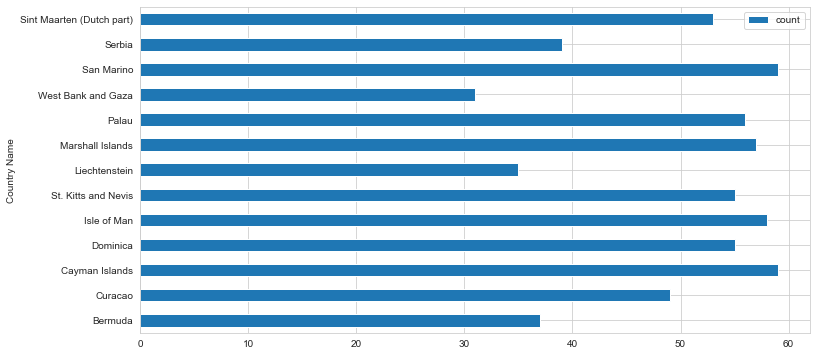

In [38]:
# checking number of missing values in each row
row_null_values=[]

for i in range(len(df_removed.index)) :
     row_null_values.append(df_removed.iloc[i].isnull().sum() ) #row_wise null values sum


null_df=pd.DataFrame(row_null_values)
country_wise_null_values=df_removed[['Country Name']].copy()


country_wise_null_values['count']=row_null_values
row_to_delete=country_wise_null_values[country_wise_null_values['count']>years_df.shape[1]/2]


fig, ax = plt.subplots(figsize=(12,6))
row_to_delete.plot(kind='barh',x='Country Name',y='count', ax=ax) #these countries has more than half missing values.

In [39]:
df_removed['missing count']=row_null_values
df_null_removed=df_removed[df_removed['missing count']<years_df.shape[1]/2]
df_null_removed.head()     #now empty rows removed, countries with more than half missing vaues removed.

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,missing count
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,NaN,1
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,NaN,1
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,NaN,1
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,NaN,1
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526,71.806825,NaN,1
